In [1]:
import os
os.chdir("..")

from src.data import extract
from src.visualization import plots
from src.descriptors import gray_level_histogram, lab_chroma_histogram, hsv_hue_weighted_histogram, concatenate_histogram
from src.similarities import euclidean_distance, l1_distance, cosine_similarity, chi_2_distance, histogram_intersection

# Paths
BBDD_DIR = "data/raw/BBDD"
QSD1_DIR = "data/raw/qsd1_w1"

# Content Based Image Retrieval - Week 1

This notebook explores the museum dataset (BBDD) and the query set (QSD1).  
We:
- Visualize some sample images.
- Convert them to different colour spaces (Gray, HSV, Lab).
- Plot their histograms according to our descriptors.
- Compute similarity distances between selected BBDD images and one query image.

This helps us understand how our descriptors behave before doing full retrieval and mAP evaluation.

1. [BBDD Dataset](#1-bbdd-dataset)
    - 1.1 [Gray-level Histogram](#11-gray-level-histogram)
        - 1.1.1 [Image bbdd_00000.jpg](#111-image-bbdd_00000jpg)
        - 1.1.2 [Image bbdd_00013.jpg](#112-image-bbdd_00013jpg)
        - 1.1.3 [Image bbdd_00045.jpg](#113-image-bbdd_00045jpg)
    - 1.2 [HSV Hue Weighted Histogram](#12-hsv-hue-weighted-histogram)
        - 1.2.1 [Image bbdd_00000.jpg](#121-image-bbdd_00000jpg)
        - 1.2.2 [Image bbdd_00013.jpg](#122-image-bbdd_00013jpg)
        - 1.2.3 [Image bbdd_00045.jpg](#123-image-bbdd_00045jpg)
    - 1.3 [CieLab Chroma Histogram](#13-cielab-chroma-histogram)
        - 1.3.1 [Image bbdd_00000.jpg](#131-image-bbdd_00000jpg)
        - 1.3.2 [Image bbdd_00013.jpg](#132-image-bbdd_00013jpg)
        - 1.3.3 [Image bbdd_00045.jpg](#133-image-bbdd_00045jpg)
    - 1.4 [Concatenated RGB Histogram](#14-concatenated-rgb-histogram)
        - 1.4.1 [Image bbdd_00000.jpg](#141-image-bbdd_00000jpg)
        - 1.4.2 [Image bbdd_00013.jpg](#142-image-bbdd_00013jpg)
        - 1.4.3 [Image bbdd_00045.jpg](#143-image-bbdd_00045jpg)

2. [QSD1 Dataset](#2-qsd1-dataset)
    - 2.1 [Gray-level Histogram](#21-gray-level-histogram)
        - 2.1.1 [Image 00000.jpg](#211-image-00000jpg)
    - 2.2 [HSV Hue Weighted Histogram](#22-hsv-hue-weighted-histogram)
        - 2.2.1 [Image 00000.jpg](#221-image-00000jpg)
    - 2.3 [CieLab Chroma Histogram](#23-cielab-chroma-histogram)
        - 2.3.1 [Image 00000.jpg](#231-image-00000jpg)

3. [Similarity Metrics between BBDD and QSD1](#3-similarity-metrics-between-bbdd-and-qsd1)
    - 3.1 [Euclidean Distance](#31-euclidean-distance)
    - 3.2 [L1 Distance](#32-l1-distance)
    - 3.3 [Cosine Similarity](#33-cosine-similarity)
    - 3.4 [Hellinger Distance](#34-hellinger-distance)
    - 3.5 [Chi-squared Distance](#35-chi-squared-distance)
    - 3.6 [Histogram Intersection](#36-histogram-intersection)


## 1. BBDD dataset




### 1.1 Gray-level Histogram

#### 1.1.1 Image `bbdd_00000.jpg`

In [2]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

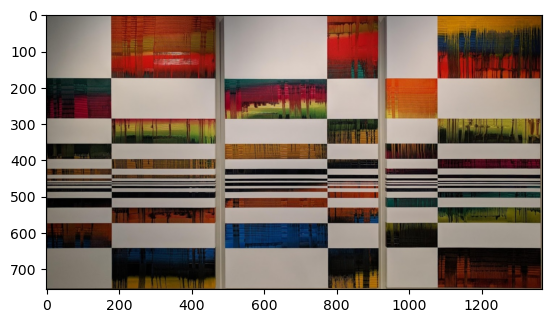

In [3]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

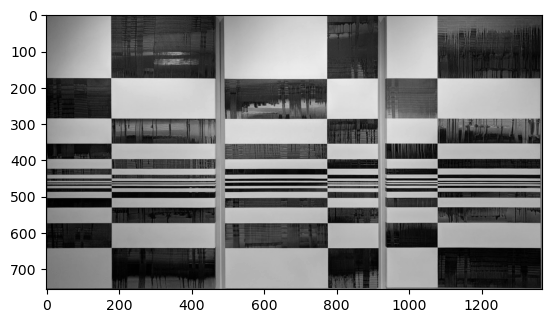

In [4]:
img1_gray = gray_level_histogram.convert_img_to_gray_scale(img1)
plots.display_image(img1_gray)

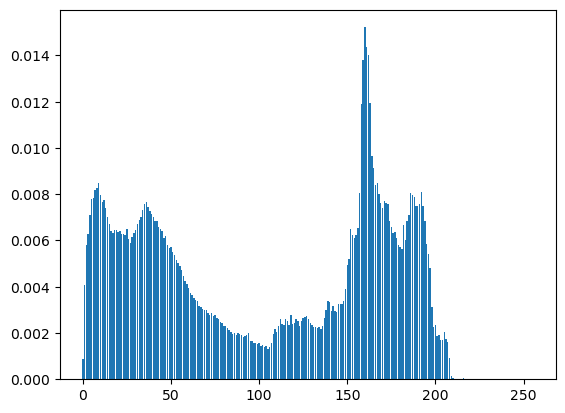

In [5]:
hist1_gray, bin_edges = gray_level_histogram.compute_histogram(img1_gray)
plots.display_histogram(hist1_gray, bin_edges)



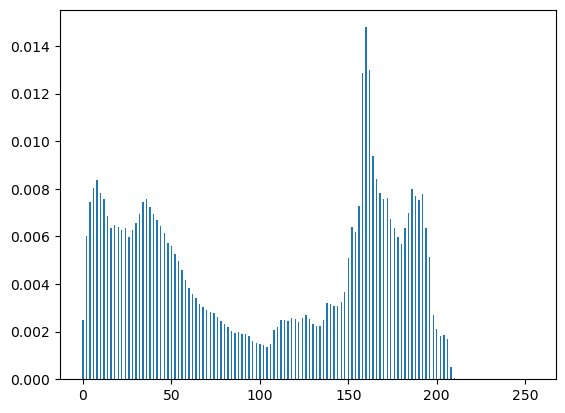

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


In [6]:
hist1_gray_2valsbin, bin_edges = gray_level_histogram.compute_histogram(img1_gray, values_per_bin=2)
plots.display_histogram(hist1_gray_2valsbin, bin_edges)
print(bin_edges[:10])

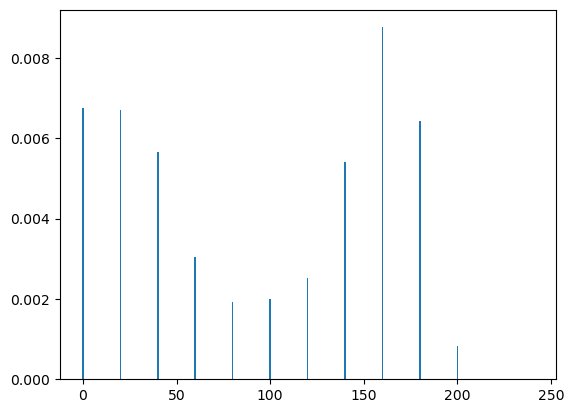

[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180.]


In [7]:
hist1_gray_20valsbin, bin_edges = gray_level_histogram.compute_histogram(img1_gray, values_per_bin=20)
plots.display_histogram(hist1_gray_20valsbin, bin_edges)
print(bin_edges[:10])

#### 1.1.2 Image `bbdd_00013.jpg`

In [8]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

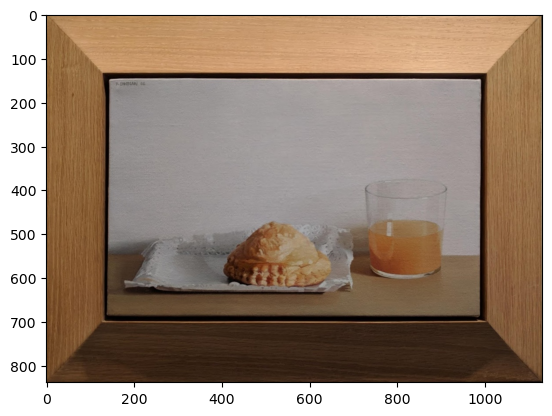

In [9]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

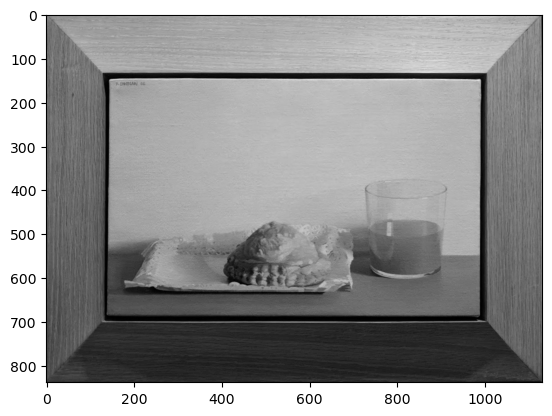

In [10]:
img2_gray = gray_level_histogram.convert_img_to_gray_scale(img2)
plots.display_image(img2_gray)

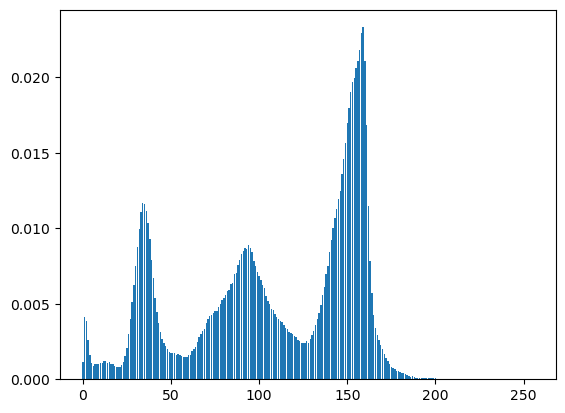

In [11]:
hist2_gray, bin_edges = gray_level_histogram.compute_histogram(img2_gray)
plots.display_histogram(hist2_gray, bin_edges)

#### 1.1.3 Image `bbdd_00045.jpg`

In [12]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

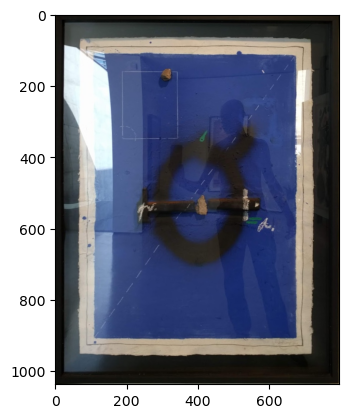

In [13]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

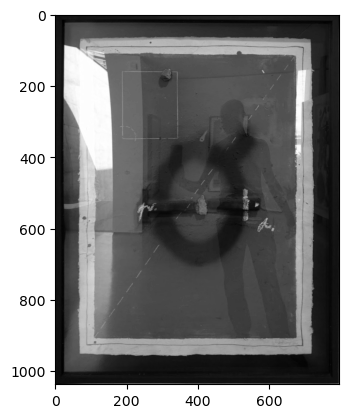

In [14]:
img3_gray = gray_level_histogram.convert_img_to_gray_scale(img3)
plots.display_image(img3_gray)

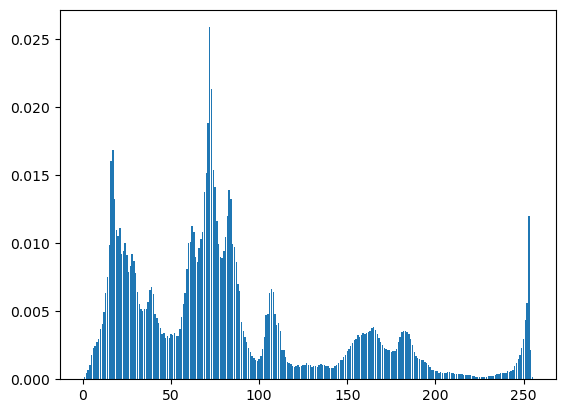

In [15]:
hist3_gray, bin_edges = gray_level_histogram.compute_histogram(img3_gray)
plots.display_histogram(hist3_gray, bin_edges)

### 1.2 HSV Hue-Weighted Histogram


#### 1.2.1 Image `bbdd_000000.jpg`

In [16]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

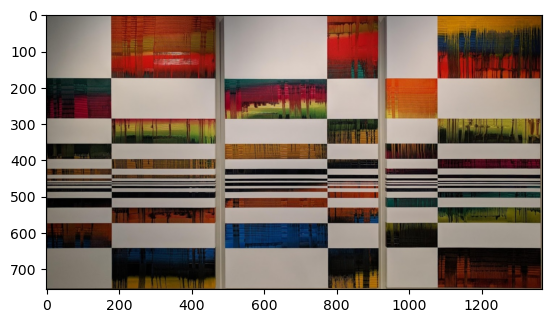

In [17]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

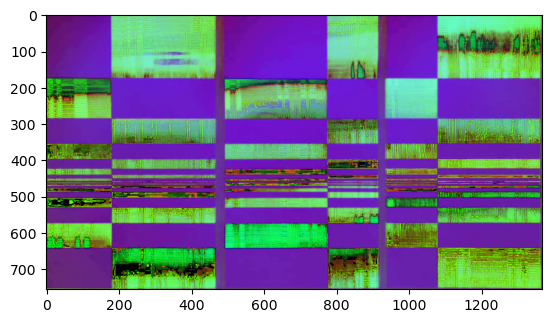

In [18]:
img1_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img1)
plots.display_image(img1_hsv)

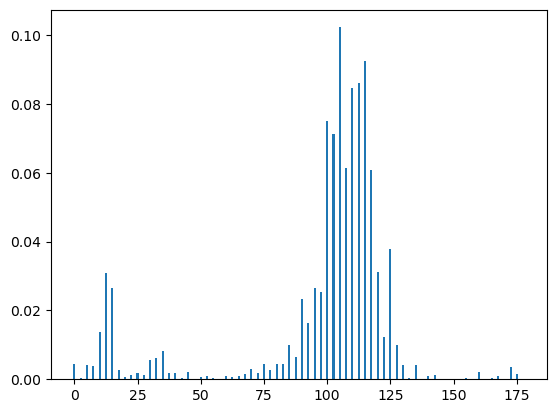

In [19]:
hist1_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img1_hsv)
plots.display_histogram(hist1_hsv, bin_edges)


#### 1.2.2 Image `bbdd_00013.jpg`

In [20]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

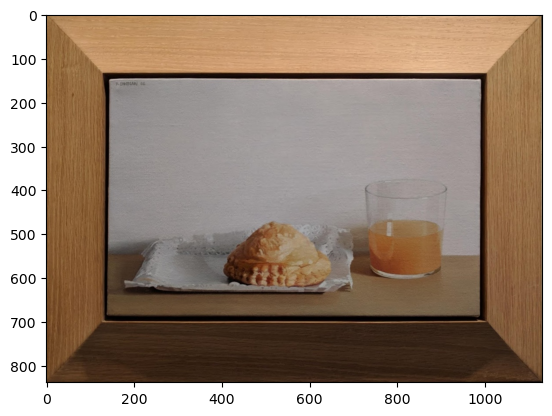

In [21]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

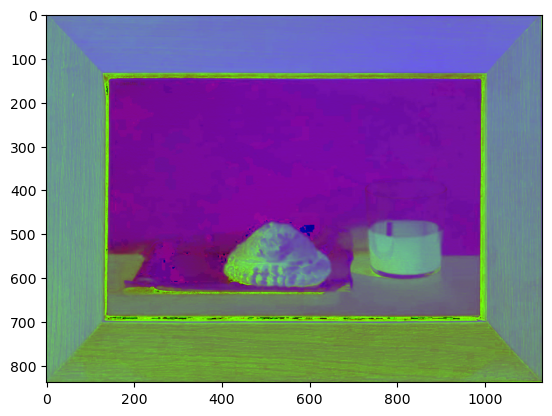

In [22]:
img2_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img2)
plots.display_image(img2_hsv)

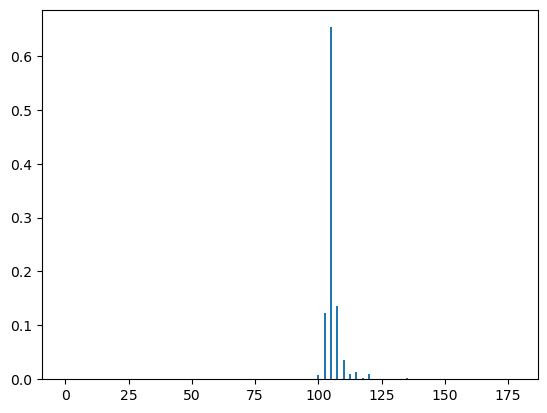

In [23]:
hist2_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img2_hsv)
plots.display_histogram(hist2_hsv, bin_edges)

#### 1.2.3 Image `bbdd_00045.jpg`

In [24]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

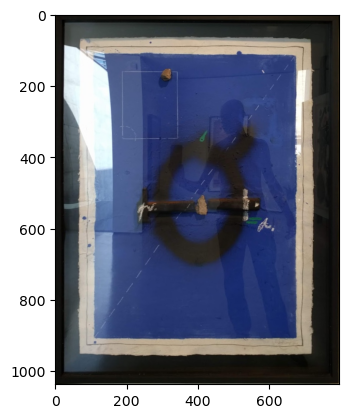

In [25]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

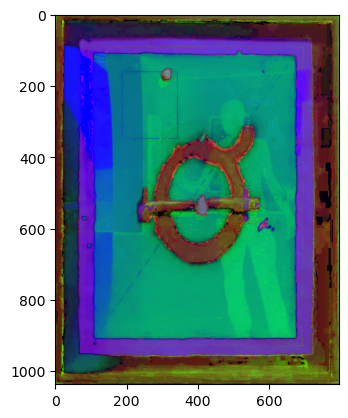

In [26]:
img3_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img3)
plots.display_image(img3_hsv)

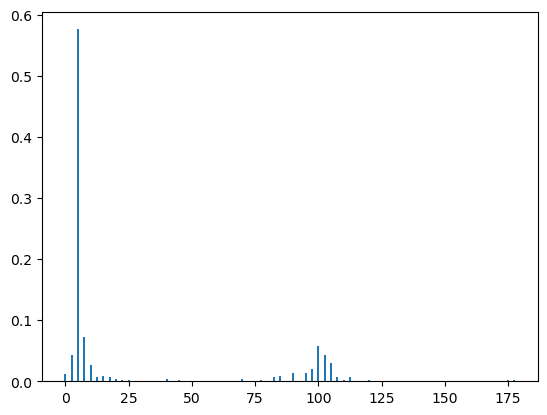

In [27]:
hist3_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img3_hsv)
plots.display_histogram(hist3_hsv, bin_edges)

### 1.3 CieLab Chroma Histogram

#### 1.3.1 Image `bbdd_00000.jpg`

In [28]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

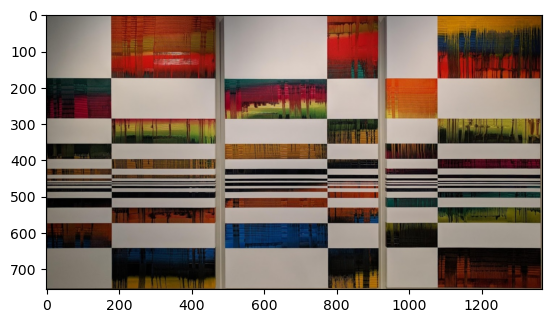

In [29]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

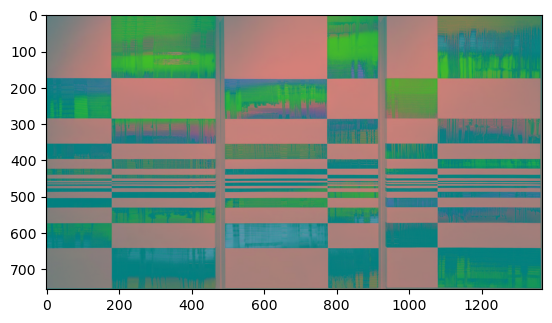

In [30]:
img1_lab = lab_chroma_histogram.convert_img_to_lab(img1)
plots.display_image(img1_lab)

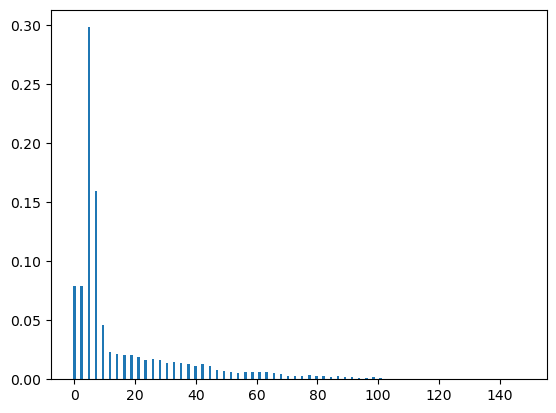

In [31]:
hist1_lab, bin_edges = lab_chroma_histogram.compute_histogram(img1_lab)
plots.display_histogram(hist1_lab, bin_edges)


#### 1.3.2 Image `bbdd_00013.jpg`

In [32]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

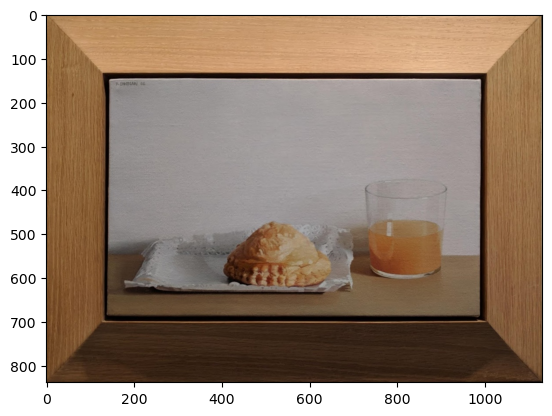

In [33]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

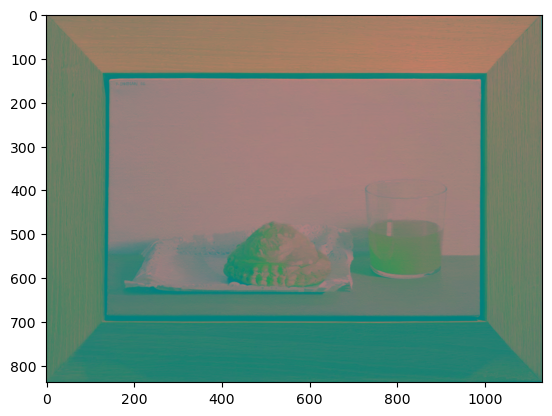

In [34]:
img2_lab = lab_chroma_histogram.convert_img_to_lab(img2)
plots.display_image(img2_lab)

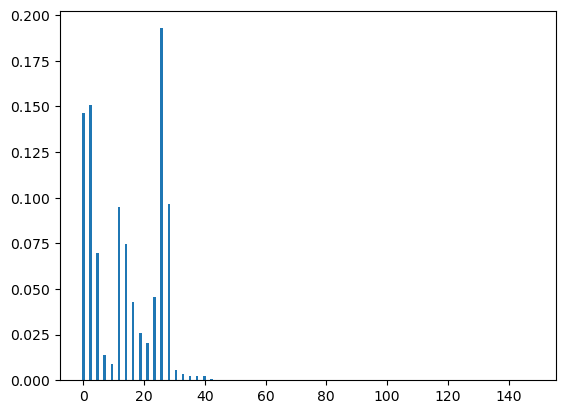

In [35]:
hist2_lab, bin_edges = lab_chroma_histogram.compute_histogram(img2_lab)
plots.display_histogram(hist2_lab, bin_edges)

#### 1.3.3 Image `bbdd_00045.jpg`

In [36]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

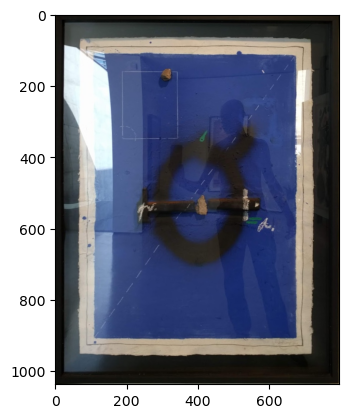

In [37]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

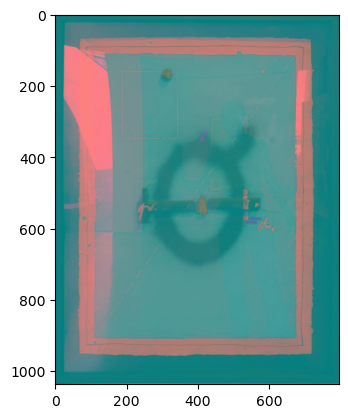

In [38]:
img3_lab = lab_chroma_histogram.convert_img_to_lab(img3)
plots.display_image(img3_lab)

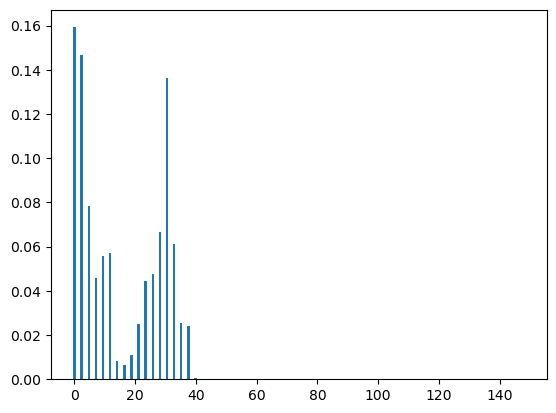

In [39]:
hist3_lab, bin_edges = lab_chroma_histogram.compute_histogram(img3_lab)
plots.display_histogram(hist3_lab, bin_edges)

### 1.4 Concatenated RGB Histogram

#### 1.4.1 Image `bbdd_00000.jpg`

In [40]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

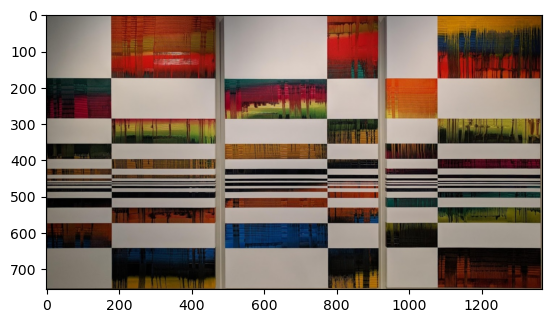

In [41]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

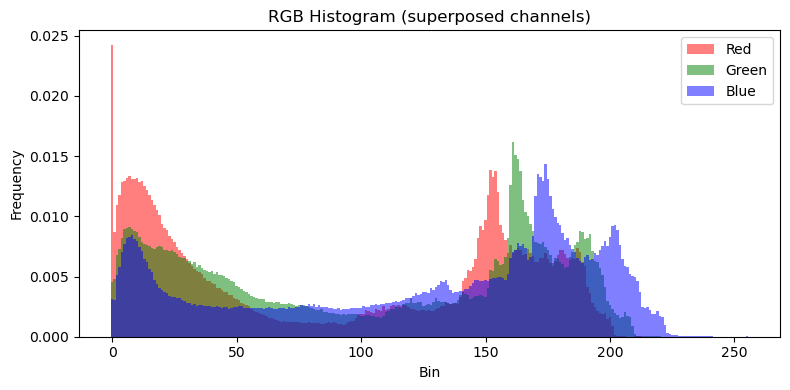

In [42]:
hist1_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img1)
plots.display_rgb_histogram(hist1_rgb, bin_edges)

#### 1.4.2 Image `bbdd_00013.jpg`

In [43]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

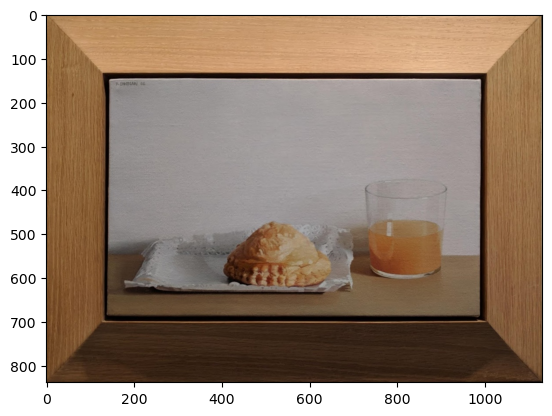

In [44]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

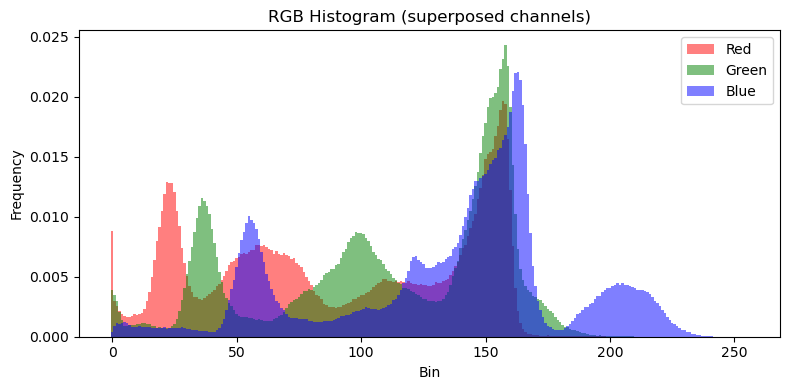

In [45]:
hist2_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img2)
plots.display_rgb_histogram(hist2_rgb, bin_edges)

#### 1.4.3 Image `bbdd_00045.jpg`

In [46]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

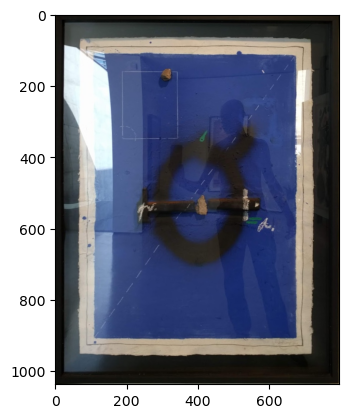

In [47]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

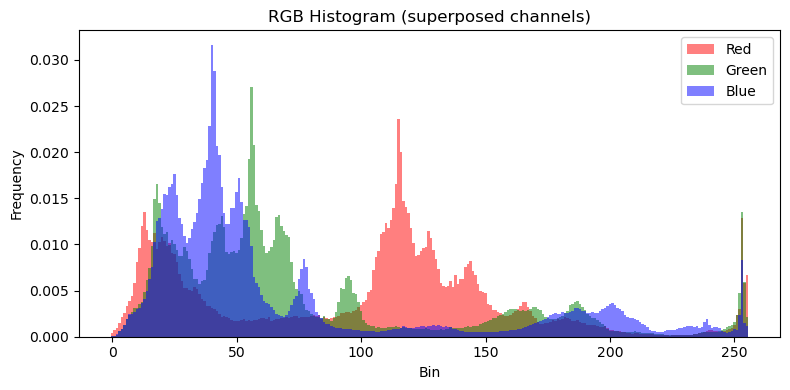

In [48]:
hist3_rgb, bin_edges = concatenate_histogram.compute_rgb_histogram(img3)
plots.display_rgb_histogram(hist3_rgb, bin_edges)

## 2. QSD1 dataset

### 2.1 Gray-level Histogram

#### 2.1.1 Image `00000.jpg`

In [49]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

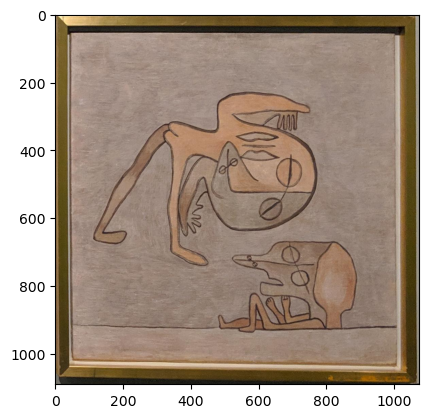

In [50]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

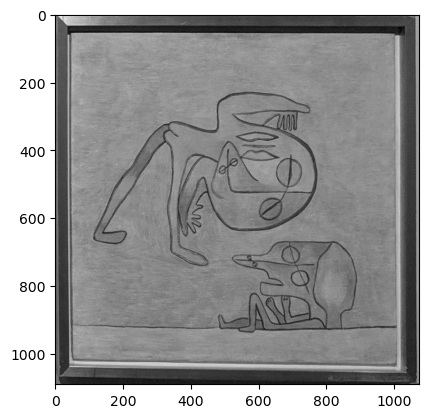

In [51]:
img4_gray = gray_level_histogram.convert_img_to_gray_scale(img4)
plots.display_image(img4_gray)

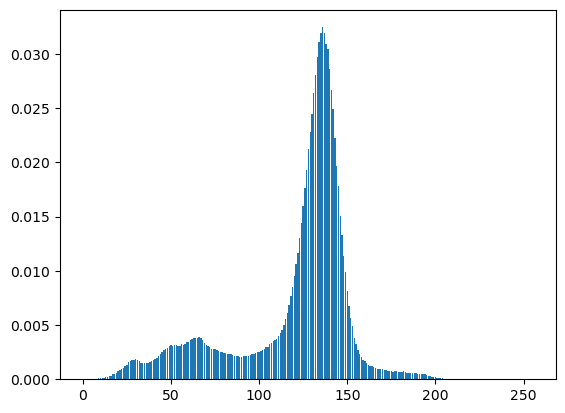

In [52]:
hist4_gray, bin_edges = gray_level_histogram.compute_histogram(img4_gray)
plots.display_histogram(hist4_gray, bin_edges)

### 2.2 HSV Hue-Weighted Histogram

### 2.2.1 Image `00000.jpg`

In [53]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

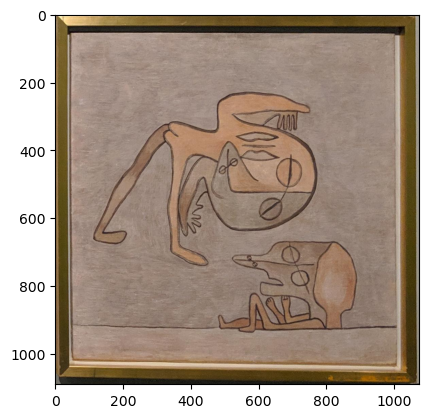

In [54]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

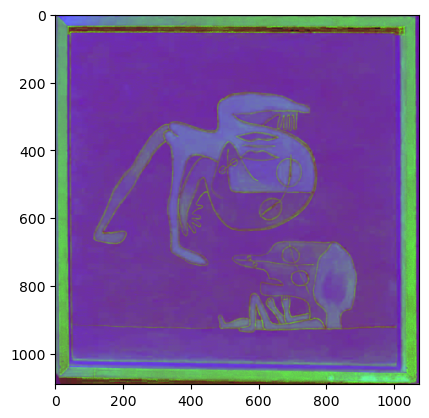

In [55]:
img4_hsv = hsv_hue_weighted_histogram.convert_img_to_hsv(img4)
plots.display_image(img4_hsv)

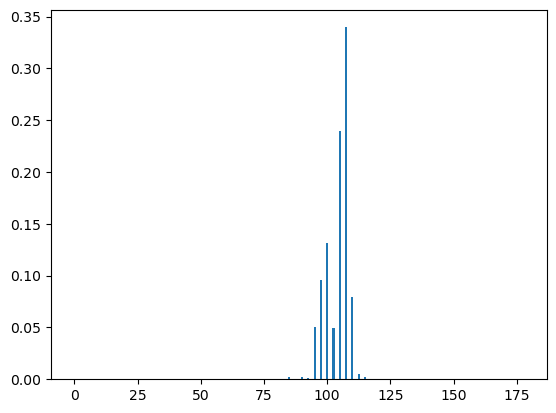

In [56]:
hist4_hsv, bin_edges = hsv_hue_weighted_histogram.compute_histogram(img4_hsv)
plots.display_histogram(hist4_hsv, bin_edges)

### 2.3 CieLab Chroma Histogram

#### 2.3.1 Image `00000.jpg`

In [57]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

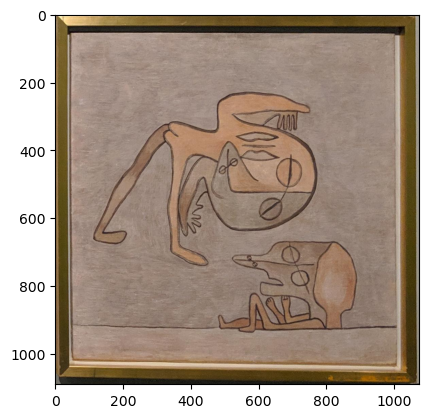

In [58]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

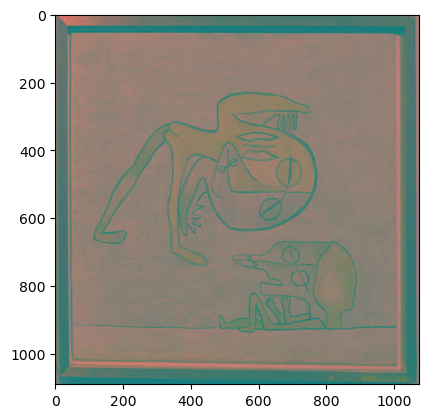

In [59]:
img4_lab = lab_chroma_histogram.convert_img_to_lab(img4)
plots.display_image(img4_lab)

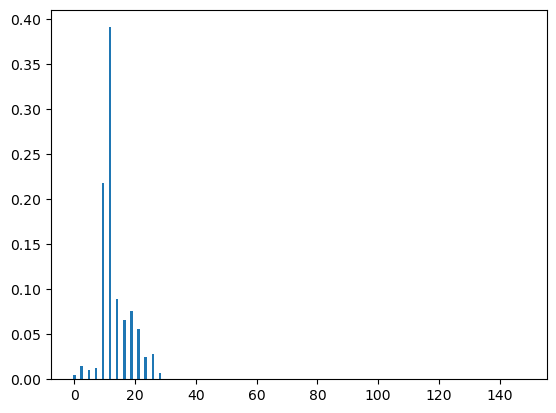

In [60]:
hist4_lab, bin_edges = lab_chroma_histogram.compute_histogram(img4_lab)
plots.display_histogram(hist4_lab, bin_edges)

## 3. Similarity Metrics between BBDD and QSD1

### 3.1 Euclidean Distance

In [61]:
# Gray-scale
print(euclidean_distance.compute_euclidean_distance(hist1_gray, hist4_gray))
print(euclidean_distance.compute_euclidean_distance(hist2_gray, hist4_gray))
print(euclidean_distance.compute_euclidean_distance(hist3_gray, hist4_gray))

0.12845100042146484
0.1206057270331903
0.14064770702733864


In [62]:
# HSV Hue Weighted
print(euclidean_distance.compute_euclidean_distance(hist1_hsv, hist4_hsv))
print(euclidean_distance.compute_euclidean_distance(hist2_hsv, hist4_hsv))
print(euclidean_distance.compute_euclidean_distance(hist3_hsv, hist4_hsv))

0.35958016
0.49676064
0.716056


In [63]:
# CieLab Chroma
print(euclidean_distance.compute_euclidean_distance(hist1_lab, hist4_lab))
print(euclidean_distance.compute_euclidean_distance(hist2_lab, hist4_lab))
print(euclidean_distance.compute_euclidean_distance(hist3_lab, hist4_lab))

0.54077244
0.4620377
0.47752276


In [74]:
# Concatenated RGB Histogram
print(euclidean_distance.compute_euclidean_distance(hist1_rgb, hist2_rgb))
print(euclidean_distance.compute_euclidean_distance(hist1_rgb, hist3_rgb))
print(euclidean_distance.compute_euclidean_distance(hist2_rgb, hist3_rgb))

0.13351241
0.14908518
0.18304291


#### 3.2 L1 Distance


In [64]:
# Gray-scale
print(l1_distance.compute_l1_distance(hist1_gray, hist4_gray))
print(l1_distance.compute_l1_distance(hist2_gray, hist4_gray))
print(l1_distance.compute_l1_distance(hist3_gray, hist4_gray))

1.24527474641154
1.0409257438562676
1.33715342838244


In [65]:
# HSV Hue Weighted
print(l1_distance.compute_l1_distance(hist1_hsv, hist4_hsv))
print(l1_distance.compute_l1_distance(hist2_hsv, hist4_hsv))
print(l1_distance.compute_l1_distance(hist3_hsv, hist4_hsv))

1.1303283
1.0428665
1.6238377


In [66]:
# CieLab Chroma
print(l1_distance.compute_l1_distance(hist1_lab, hist4_lab))
print(l1_distance.compute_l1_distance(hist2_lab, hist4_lab))
print(l1_distance.compute_l1_distance(hist3_lab, hist4_lab))

1.5326576
1.2565184
1.4653263


In [75]:
# Concatenated RGB Histogram
print(l1_distance.compute_l1_distance(hist1_rgb, hist2_rgb))
print(l1_distance.compute_l1_distance(hist1_rgb, hist3_rgb))
print(l1_distance.compute_l1_distance(hist2_rgb, hist3_rgb))

2.6251545
2.8462121
3.291263


### 3.3 Cosine Similarity

In [67]:
# Gray-scale
print(cosine_similarity.compute_cosine_similarity(hist1_gray, hist4_gray))
print(cosine_similarity.compute_cosine_similarity(hist2_gray, hist4_gray))
print(cosine_similarity.compute_cosine_similarity(hist3_gray, hist4_gray))

0.31792294144961597
0.4718631042062126
0.2256031362838814


In [68]:
# HSV Hue Weighted
print(cosine_similarity.compute_cosine_similarity(hist1_hsv, hist4_hsv))
print(cosine_similarity.compute_cosine_similarity(hist2_hsv, hist4_hsv))
print(cosine_similarity.compute_cosine_similarity(hist3_hsv, hist4_hsv))

0.6285135
0.6825835
0.0828597


In [69]:
# CieLab Chroma
print(cosine_similarity.compute_cosine_similarity(hist1_lab, hist4_lab))
print(cosine_similarity.compute_cosine_similarity(hist2_lab, hist4_lab))
print(cosine_similarity.compute_cosine_similarity(hist3_lab, hist4_lab))

0.18777843
0.39087385
0.31040558


In [76]:
# Concatenated RGB Histogram
print(cosine_similarity.compute_cosine_similarity(hist1_rgb, hist2_rgb))
print(cosine_similarity.compute_cosine_similarity(hist1_rgb, hist3_rgb))
print(cosine_similarity.compute_cosine_similarity(hist2_rgb, hist3_rgb))

0.63822037
0.54934365
0.40303138


### 3.4 Hellinger Distance

### 3.5 Chi-squared Distance

In [78]:
# Gray-scale
print(chi_2_distance.compute_chi_2_distance(hist1_gray, hist4_gray))
print(chi_2_distance.compute_chi_2_distance(hist2_gray, hist4_gray))
print(chi_2_distance.compute_chi_2_distance(hist3_gray, hist4_gray))

0.9381608582089409
0.6585240720811267
1.0420490643888527


In [79]:
# HSV Hue Weighted
print(chi_2_distance.compute_chi_2_distance(hist1_hsv, hist4_hsv))
print(chi_2_distance.compute_chi_2_distance(hist2_hsv, hist4_hsv))
print(chi_2_distance.compute_chi_2_distance(hist3_hsv, hist4_hsv))

0.82759744
0.61140025
1.4545684


In [80]:
# CieLab Chroma
print(chi_2_distance.compute_chi_2_distance(hist1_lab, hist4_lab))
print(chi_2_distance.compute_chi_2_distance(hist2_lab, hist4_lab))
print(chi_2_distance.compute_chi_2_distance(hist3_lab, hist4_lab))

1.2486913
0.92731863
1.1489035


In [77]:
# Concatenated RGB Histogram
print(chi_2_distance.compute_chi_2_distance(hist1_rgb, hist2_rgb))
print(chi_2_distance.compute_chi_2_distance(hist1_rgb, hist3_rgb))
print(chi_2_distance.compute_chi_2_distance(hist2_rgb, hist3_rgb))

1.5217211
1.7026665
2.357213


### 3.6 Histogram Intersection

In [81]:
# Gray-scale
print(histogram_intersection.compute_histogram_intersection(hist1_gray, hist4_gray))
print(histogram_intersection.compute_histogram_intersection(hist2_gray, hist4_gray))
print(histogram_intersection.compute_histogram_intersection(hist3_gray, hist4_gray))

0.37736262679423
0.4795371280718662
0.33142328580878005


In [82]:
# HSV Hue Weighted
print(histogram_intersection.compute_histogram_intersection(hist1_hsv, hist4_hsv))
print(histogram_intersection.compute_histogram_intersection(hist2_hsv, hist4_hsv))
print(histogram_intersection.compute_histogram_intersection(hist3_hsv, hist4_hsv))

0.43483585
0.47856674
0.18808113


In [83]:
# CieLab Chroma
print(histogram_intersection.compute_histogram_intersection(hist1_lab, hist4_lab))
print(histogram_intersection.compute_histogram_intersection(hist2_lab, hist4_lab))
print(histogram_intersection.compute_histogram_intersection(hist3_lab, hist4_lab))

0.23367122
0.37174082
0.26733685


In [84]:
# Concatenated RGB Histogram
print(histogram_intersection.compute_histogram_intersection(hist1_rgb, hist2_rgb))
print(histogram_intersection.compute_histogram_intersection(hist1_rgb, hist3_rgb))
print(histogram_intersection.compute_histogram_intersection(hist2_rgb, hist3_rgb))

1.6874228
1.5768939
1.3543684
